We'll start with some common imports  

Common imports  

In [24]:
from google.colab import drive
from pathlib import Path
import pathlib
import shutil
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
DATA_PATH = "/content/drive/MyDrive/UM_MSC/Research_Thermal_Imaging/data/ThermoDataBase"
IMG_PATH = DATA_PATH 
TEST_PATH = IMG_PATH + "/Further_Test"
ALL_PATH = IMG_PATH + "/All"
TEST_IMAGE_PATH_L = IMG_PATH + "/All/L"
TEST_IMAGE_PATH_R = IMG_PATH + "/All/R"
TEST_IMAGE_PATH_SORTED = IMG_PATH + "/All/Updated/CompressedData/Train"
SORTED_IMG_PATH = IMG_PATH + "/All/Sorted"
GT_PATH = IMG_PATH + "/Further_Test/truth"
CSV_FILE_PATH = "/content/drive/MyDrive/UM_MSC/Research_Thermal_Imaging/data/ThermoDataBase/csvs/mlfeatures/"

In [26]:
cd $IMG_PATH

/content/drive/MyDrive/UM_MSC/Research_Thermal_Imaging/data/ThermoDataBase


In [27]:
# imports
import os, sys

# third party imports
import cv2
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2.')

---

In [28]:
from PIL import Image
import csv
import matplotlib.pyplot as plt

In [29]:
sub_path = ["", "/Augmented1", "/Augmented2"]
path = Path(TEST_IMAGE_PATH_SORTED + sub_path[1])
curr_path = TEST_IMAGE_PATH_SORTED + sub_path[1]


#TEST_IMAGE_PATH_SORTED = SORTED_IMG_PATH

In [30]:
cd $curr_path


/content/drive/MyDrive/UM_MSC/Research_Thermal_Imaging/data/ThermoDataBase/All/Updated/CompressedData/Train/Augmented1


In [31]:
len(list(path.glob("*/**/*")))

9450

In [32]:
curr_path

'/content/drive/MyDrive/UM_MSC/Research_Thermal_Imaging/data/ThermoDataBase/All/Updated/CompressedData/Train/Augmented1'

In [33]:
# Load images

# LEFT IMAGES
diabetic_images_L = np.array([np.asarray(Image.open("./DM_L/"+path_name).convert('L')) for path_name in sorted(os.listdir(curr_path + "/DM_L"))])
control_images_L = np.array([np.asarray(Image.open("./CG_L/"+path_name).convert('L')) for path_name in sorted(os.listdir(curr_path + "/CG_L"))])
all_images_L = np.append(diabetic_images_L, control_images_L, axis=0)

# RIGHT FOOT
diabetic_images_R = np.array([np.asarray(Image.open("./DM_R/"+path_name).convert('L')) for path_name in sorted(os.listdir(curr_path + "/DM_R"))])
control_images_R = np.array([np.asarray(Image.open("./CG_R/"+path_name).convert('L')) for path_name in sorted(os.listdir(curr_path + "/CG_R"))])
all_images_R = np.append(diabetic_images_R, control_images_R, axis=0)


In [34]:
print(f'Diabetic Images: {diabetic_images_L.shape} Control Images: {control_images_L.shape}, All: {all_images_L.shape}')
print(f'Diabetic Images: {diabetic_images_R.shape} Control Images: {control_images_R.shape}, All: {all_images_R.shape}')

Diabetic Images: (1050, 128, 128) Control Images: (1047, 128, 128), All: (2097, 128, 128)
Diabetic Images: (1050, 128, 128) Control Images: (1047, 128, 128), All: (2097, 128, 128)


In [35]:
def sort_func(p):
  p = p.strip('pred-annotations')
  p = p.strip('fixed')
  p = p.strip('fixed-annotations')
  p = p.strip('.npy')
  return int(p)


In [36]:
def get_results_from_path(pathname):
  fixed_annotations = []
  pred_annotations = []
  pred_images = []
  fixed_images = []
  path = Path(pathname)
  for p in sorted(os.listdir(pathname), key = sort_func):
    start_name = p
    my_file = Path(pathname + p)
    if start_name.startswith("pred-annotations"):
      pred_annotations.append(np.load(my_file))
  return pred_annotations

In [37]:
# CONTROL L & R
pred_annotations_CL  = get_results_from_path(curr_path + "/Annotations/CG_L/")
pred_annotations_CR  = get_results_from_path(curr_path + "/Annotations/CG_R/")
# DIABETIC L & R
pred_annotations_DL  = get_results_from_path(curr_path  + "/Annotations/DM_L/")
pred_annotations_DR  = get_results_from_path(curr_path + "/Annotations/DM_R/")

In [38]:
pred_CL = control_images_L
pred_CR = control_images_R
pred_DL = diabetic_images_L
pred_DR = diabetic_images_R

In [39]:
print(f'CL: Pred Images {len(pred_CL)}, Pred Annot {len(pred_annotations_CL)}')
print(f'CR: Pred Images {len(pred_CR)}, Pred Annot {len(pred_annotations_CR)}')
print(f'DL: Pred Images {len(pred_DL)}, Pred Annot {len(pred_annotations_DL)}')
print(f'DR: Pred Images {len(pred_DR)}, Pred Annot {len(pred_annotations_DR)}')

CL: Pred Images 1047, Pred Annot 1047
CR: Pred Images 1047, Pred Annot 1047
DL: Pred Images 1050, Pred Annot 1050
DR: Pred Images 1050, Pred Annot 1050


Verifying correctness of images and annotations...


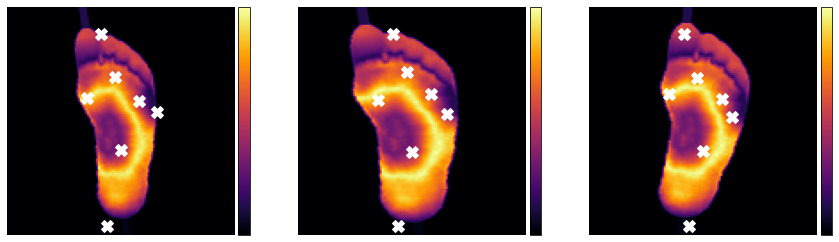

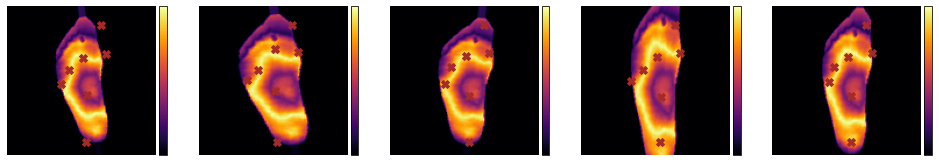

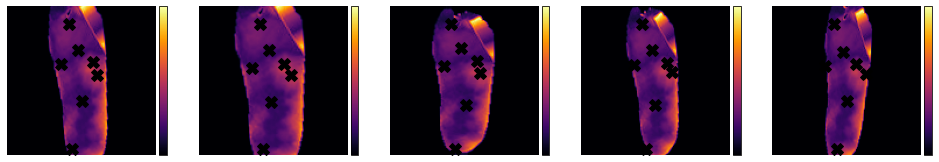

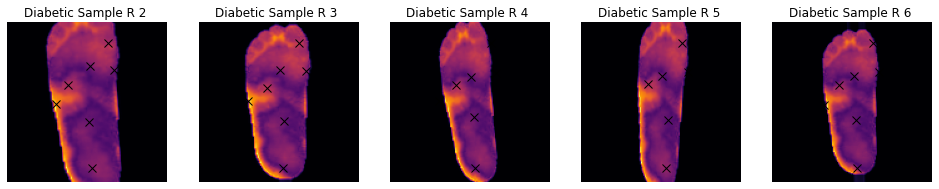

In [40]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
print("Verifying correctness of images and annotations...")
plt.figure(figsize=(20, 5))
for i in range(1,4):
  ax = plt.subplot(1,4,i+1)
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.05)
  im = ax.imshow(pred_CL[i], cmap='inferno')
  ax.axis('off')
  plt.colorbar(im, cax=cax)
  ax.plot(*[pred_annotations_CL[i][:, f] for f in [0, 1]], "X", color="white", markersize=12, linewidth=8)  
  plt.axis('off')


plt.figure(figsize=(20, 5))
for i in range(1,6):
  ax = plt.subplot(1,6,i+1)
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.05)
  im = ax.imshow(pred_CR[i], cmap='inferno')
  ax.axis('off')
  plt.colorbar(im, cax=cax)
  # create an axes on the right side of ax. The width of cax will be 5%
  # of ax and the padding between cax and ax will be fixed at 0.05 inch.
  plt.axis('off')
  ax.plot(*[pred_annotations_CR[i][:, f] for f in [0, 1]], "X", color="brown", markersize=8, linewidth=8)


plt.figure(figsize=(20, 5))
for i in range(0,5):
  ax = plt.subplot(1,6,i+1)
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.05)
  im = ax.imshow(pred_DL[i], cmap='inferno')
  ax.axis('off')
  plt.colorbar(im, cax=cax)
  ax.plot(*[pred_annotations_DL[i][:, f] for f in [0, 1]], "X", color="black", markersize=12, linewidth=8)  
  plt.axis('off')


plt.figure(figsize=(20, 5))
for i in range(1,6):
  ax = plt.subplot(1,6,i+1)
  ax.imshow(pred_DR[i], cmap='inferno')
  plt.plot(*[pred_annotations_DR[i][:, f] for f in [0, 1]], 'x', color="black", markersize=8, linewidth=8)  
  plt.axis('off')
  plt.title(f'Diabetic Sample R {i+1} ')

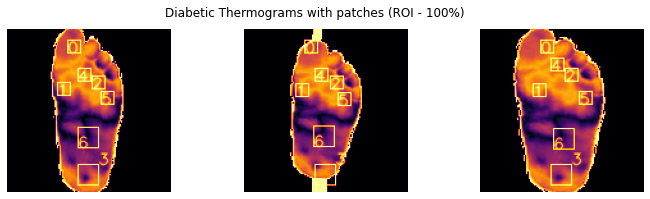

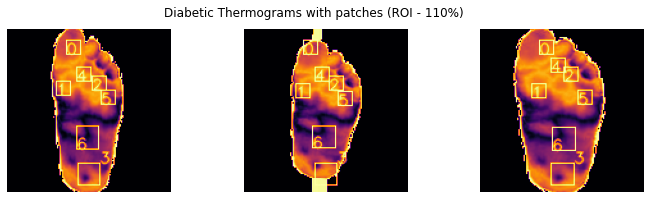

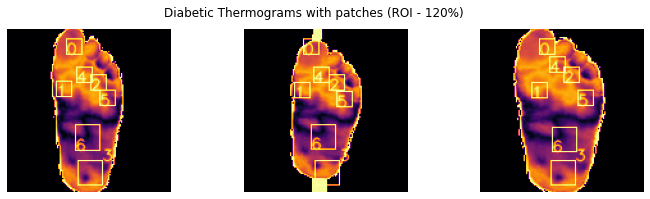

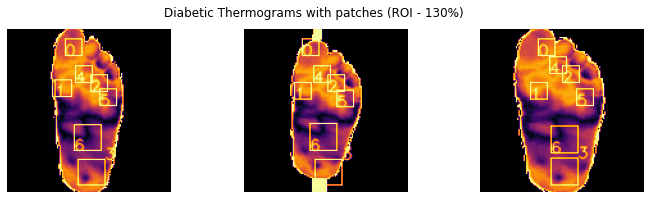

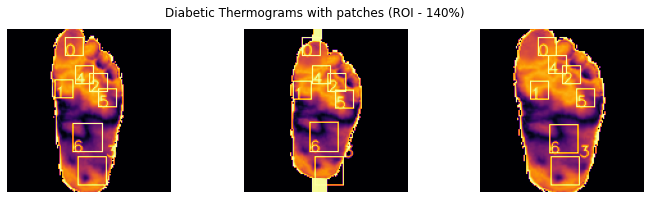

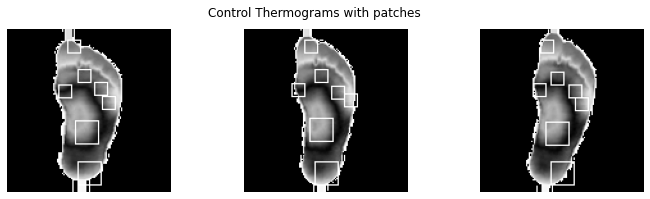

In [41]:
from math import floor

# Draw the rectangle patches to see if it works
IMAGES_TO_SHOW = 3
BASE_ROI_SIZE = 5
BASE_LARGE_ROI_SIZE = 8

for size in np.arange(1, 1.5, 0.1):
  fig = plt.figure(figsize=(IMAGES_TO_SHOW * 4,3))
  fig.suptitle(f'Diabetic Thermograms with patches (ROI - {int(size * 100)}%)')

  for i in range(IMAGES_TO_SHOW):
    ax = plt.subplot(1,IMAGES_TO_SHOW,i+1)
    im = np.copy(pred_DL[i+100] * 255)

    
    for idx, z in enumerate(pred_annotations_DL[i+100]):
      half_patch = BASE_ROI_SIZE * size # pixels = 4x4 patches
      if(idx == 3 or idx == 6):
        half_patch = BASE_LARGE_ROI_SIZE * size # pixels = 4x4 patches
      x = z[0]
      y = z[1]

      if(idx == 3):
        topx = x + half_patch*2
        topy = y - half_patch*2
        
        botx = x 
        boty = y 
      else:
        topx = x - half_patch
        topy = y + half_patch
        
        botx = x + half_patch
        boty = y - half_patch

      top = (int(floor(topx)), int(floor(topy)))
      bot = (int(floor(botx)), int(floor(boty)))

      im = cv2.rectangle(im,top,bot,(255,0,0),1)

      # font
      font = cv2.FONT_HERSHEY_SIMPLEX
        
      # Blue color in BGR
      color = (255, 255, 255)
        
      # Line thickness of 2 px
      thickness = 2
        
      # Using cv2.putText() method
      image = cv2.putText(im, f'{idx}', top, font, 
                        0.4, color, 1, cv2.LINE_AA)
    plt.axis('off')
    plt.imshow(im, cmap="inferno")


# For diabetes
fig = plt.figure(figsize=(IMAGES_TO_SHOW * 4,3))
fig.suptitle('Control Thermograms with patches')
for i in range(IMAGES_TO_SHOW):
  ax = plt.subplot(1,IMAGES_TO_SHOW,i+1)

  im = np.copy(pred_CL[i + 10] * 255)

  
  for idx, z in enumerate(pred_annotations_CL[i + 20]):
    half_patch = 5 # pixels = 4x4 patches
    if(idx == 3 or idx == 6):
      half_patch = 9 # pixels = 4x4 patches
    x = z[0]
    y = z[1]

    
    if(idx == 3):
      topx = x + half_patch*2
      topy = y - half_patch*2
      
      botx = x 
      boty = y 
    else:
      topx = x - half_patch
      topy = y + half_patch
      
      botx = x + half_patch
      boty = y - half_patch

    top = (int(floor(topx)), int(floor(topy)))
    bot = (int(floor(botx)), int(floor(boty)))

    im = cv2.rectangle(im,top,bot,(255,0,0),1)
  plt.axis('off')
  plt.imshow(im,cmap="gray")

## Patch analysis between Diabetes and Control patients


In [ ]:
def save_image(data, name, dir):
    np.save(dir+"/"+name, data)

In [42]:
BASE_ROI_SIZE = 5
BASE_LARGE_ROI_SIZE = 8
def extract_patch_and_save(data, annotations, type_name, dir="", scale=1.0, orient="L"):
  
  roi_patches = []

  # Repeat process for seven ROIS. 
  for roi_idx in range(0,7):
    im = np.copy(data * 255)

    # Extract ROI
    ROI = annotations[roi_idx]
    half_patch = BASE_ROI_SIZE * scale  # Joint region smaller ROIs
    if(orient == "L"):
      if(roi_idx == 3 or roi_idx == 6):
        half_patch = BASE_LARGE_ROI_SIZE * scale # Plantar region large ROIs
    elif(orient == "R"): 
      if(roi_idx >= 5):
        half_patch = BASE_LARGE_ROI_SIZE * scale # pixels = 4x4 patches


    x = ROI[0] 
    y = ROI[1]

    
    
    botx = x 
    boty = y 
      
    topx = int(floor(x - half_patch))
    topy = int(floor(y - half_patch))

    botx = int(floor(x + half_patch))
    boty = int(floor(y + half_patch))


    if(orient == "L"):
      # Make ROI 6 and 7 larger
      if(roi_idx == 3 or roi_idx == 6):
          topy = int(floor(y - half_patch * 2))
          boty = int(floor(y))
    else:
      # Make ROI 6 and 7 larger
        if(roi_idx > 5):
          topy = int(floor(y - half_patch * 2))
          boty = int(floor(y))



    top = (topx, topy)
    bot = (botx, boty)

    ROI_slice = im[topy + 1 : boty, topx + 1: botx]

    roi_patches.append(ROI_slice)
    name = f"{type_name}-" + str(i)+"-ROI-" + str(roi_idx)

      # save_image(ROI_slice, name, dir)
      # print(ROI_slice)
      # im = cv2.rectangle(im,top,bot,(255,0,0),1)
      # plt.figure()
      # plt.imshow(im)

  return roi_patches

In [43]:

def write_to_csv(file_name, fields, rows):
  '''
    Input: 
      file_name = Name of the file,
      fields = the columns of the table
      rows = the input rows of the table
    Output: 
  '''
      
  # name of csv file 
  filename = CSV_FILE_PATH + file_name + ".csv"

  
  # writing to csv file 
  with open(filename, 'w') as csvfile: 
      # creating a csv writer object 
      csvwriter = csv.writer(csvfile) 
          
      # writing the fields 
      csvwriter.writerow(fields) 
          
      # writing the data rows 
      csvwriter.writerows(rows)
      
  print(f"Successfully written to {filename}")

glcm_feat = [ "contrast", "ASM", "correlation", "mean", "dissimilarity","homogeneity","energy","skewness","kurtosis","variance"]
def generate_feat_dict(roi_number, feat_arr):
  feat_dict = {}
  # Create empty array for each feat
  for name in feat_arr:
    for i in range(1, roi_number + 1):
      feat_dict[name + "-" + str(i)] = []
    
  return feat_dict



In [44]:
from scipy import stats
import pywt
import pandas as pd
import pywt.data
from skimage.data import lfw_subset
from skimage.transform import integral_image
from skimage.feature import haar_like_feature
from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature

from skimage.feature import greycomatrix, greycoprops
from skimage import data


def extract_glcm_feat(data, feat_dict, idx):

  patch_normed = data
  patch = patch_normed.astype(np.uint8)
  glcm = greycomatrix(patch, [2], [0], symmetric=True, normed=True)
  feat_dict['dissimilarity-' + str(idx)].append(greycoprops(glcm, 'dissimilarity')[0, 0])
  feat_dict['contrast-' + str(idx)].append(greycoprops(glcm, 'contrast')[0, 0])
  feat_dict['homogeneity-' + str(idx)].append(greycoprops(glcm, 'homogeneity')[0, 0])
  feat_dict['ASM-' + str(idx)].append(greycoprops(glcm, 'ASM')[0, 0])
  feat_dict['energy-' + str(idx)].append(greycoprops(glcm, 'energy')[0, 0])
  feat_dict['correlation-' + str(idx)].append(greycoprops(glcm, 'correlation')[0, 0])
  feat_dict['mean-' + str(idx)].append(np.mean(data))
  return feat_dict

def describe_image_stats(im, feat_dict, idx):
  st = stats.describe(im.flatten())
  feat_dict['skewness-' + str(idx)].append(st.skewness)
  feat_dict['kurtosis-' + str(idx)].append(st.kurtosis)
  feat_dict['variance-' + str(idx)].append(st.variance)
  return feat_dict


feature_types = ['type-2-x', 'type-2-y']

def extract_wavlet_features(data, features):
  all = []
  coeffs2 = pywt.dwt2(data, 'haar')
  for n in coeffs2:
    all.extend(np.array(n).flatten())
  features.extend(all)

def extract_feature_image(img, feature_type, features, feature_coord=None):
    """Extract the haar feature for the current image"""
    ii = integral_image(img)
    X = haar_like_feature(ii, 0, 0, ii.shape[0], ii.shape[1],
                             feature_type=feature_type,
                             feature_coord=feature_coord)
    features.extend(X)



## Extract features from ROIs and save them to csv

In [23]:
scales = [1.0, 1.1, 1.2, 1.3, 1.4]


for scale in scales:

  feat_dict = generate_feat_dict(7, glcm_feat)
  feat_dict_r = generate_feat_dict(7, glcm_feat)
  data_DL = []
  data_DR = []
  data_CL = []
  data_CR = []

  # DIABETIC DATA
  for idx, data in enumerate(pred_DL):
    arr = extract_patch_and_save(data, pred_annotations_DL[idx], type_name="DM", dir = "", orient="L", scale=scale)
    for i,roi in enumerate(arr):
      extract_glcm_feat(roi, feat_dict, i+1)
      describe_image_stats(roi, feat_dict, i+1)

  dataDL = pd.DataFrame.from_dict(feat_dict)
  dataDL = dataDL.assign(label = np.ones(len(pred_DL)).astype(int))

  for idx, data in enumerate(pred_DR):
    arr = extract_patch_and_save(data, pred_annotations_DR[idx], type_name="DM", dir = "", orient="R", scale=scale)
    for i,roi in enumerate(arr):
      extract_glcm_feat(roi, feat_dict_r, i+1)
      describe_image_stats(roi, feat_dict_r, i+1)

  dataDR = pd.DataFrame.from_dict(feat_dict_r)
  dataDR = dataDR.assign(label = np.ones(len(pred_DR)).astype(int))

  # CONTROL DATA
  feat_dict = generate_feat_dict(7, glcm_feat)
  feat_dict_r = generate_feat_dict(7, glcm_feat)

  for idx, data in enumerate(pred_CL):
    arr = extract_patch_and_save(data, pred_annotations_CL[idx], type_name="CG", dir = "", orient="L", scale=scale)
    for i,roi in enumerate(arr):
      extract_glcm_feat(roi, feat_dict, i+1)
      describe_image_stats(roi, feat_dict, i+1)

  dataCL = pd.DataFrame.from_dict(feat_dict)
  dataCL = dataCL.assign(label = np.zeros(len(pred_CL)).astype(int))

  for idx, data in enumerate(pred_CR):
    arr = extract_patch_and_save(data, pred_annotations_CR[idx], type_name="CG", dir = "", orient="R", scale=scale)
    for i,roi in enumerate(arr):
      extract_glcm_feat(roi, feat_dict_r, i+1)
      describe_image_stats(roi, feat_dict_r, i+1)

  dataCR = pd.DataFrame.from_dict(feat_dict_r)
  dataCR = dataCR.assign(label = np.zeros(len(pred_CR)).astype(int))

  AllDataRight = pd.concat([dataDR, dataCR])
  AllDataLeft = pd.concat([dataDL, dataCL])

  AllDataRight.to_csv(CSV_FILE_PATH+f"RIGHT-{scale * 100}-FEATURES-AUG.csv")
  AllDataLeft.to_csv(CSV_FILE_PATH+f"LEFT-{scale * 100}-FEATURES-AUG.csv")

In [ ]:
sizes = ["0%", "10%", "20%", "30%", "40%"]
scales = [1.0, 1.1, 1.2, 1.3, 1.4]
paths = [CG_L_PATH, CG_R_PATH, DM_L_PATH, DM_R_PATH]
names = ["CL", "CR", "DL", "DR"]
orient = ["L", "R", "L", "R"]
preds = [pred_CL, pred_CR, pred_DL, pred_DR]
annot =[pred_annotations_CL, pred_annotations_CR, pred_annotations_DL, pred_annotations_DR]

# Make paths for storing different ROI sizes if it does not exist
for s in sizes:
  for p in paths:
    path_to_check = p + f"/roi-{s}"
    if(not os.path.isdir(path_to_check)):
      os.mkdir(path_to_check)
    

In [ ]:
for idx, p in enumerate(paths):
  for i, sc in enumerate(scales):
    # For each path and scale
    extract_patch_and_save(preds[idx], annot[idx],names[idx],paths[idx] + f"/roi-{sizes[i]}", sc, orient[idx])

315
315
315
315
315
315
315
315
315
315
854
854
854
854
854
854
854
854
854
854


In [ ]:
# extract_patch_and_save(pred_CL[0:1], pred_annotations_CL[0:3],"CL",CG_L_PATH+"/rois-large", scale=1.4, orient = "L")
# extract_patch_and_save(pred_CR[0:1], pred_annotations_CR[0:3],"CR",CG_L_PATH+"/rois-large", scale=1.4, orient = "R")
# extract_patch_and_save(pred_DL[0:1], pred_annotations_DL[0:3],"DL",CG_L_PATH+"/rois-large", scale=1.4, orient = "L")
# extract_patch_and_save(pred_DR[0:1], pred_annotations_DR[0:3],"DR",CG_L_PATH+"/rois-large", scale=1.4, orient = "R")
#extract_patch_and_save(pred_CR, pred_annotations_CR,"CR",CG_R_PATH+"/rois-large")
#extract_patch_and_save(pred_DL, pred_annotations_DL,"DL",DM_L_PATH+"/rois-large")
# extract_patch_and_save(pred_DR, pred_annotations_DR,"DR",DM_R_PATH+"/rois-large")